# 快速入门 GPT-4 Vison

从历史上看，语言模型系统仅接受**文本**作为输入。但是单一的输入形式，限制了大模型的应用落地范围。

随着技术发展，OpenAI 开发的 GPT-4 Turbo with Vision（简称 GPT-4V）允许模型接收**图像**作为输入，并回答关于它们的问题。

📢注意，目前在 Assistants API 中使用 GPT-4 时还不支持图像输入。

## 使用 GPT-4V 识别线上图像（URL）

![image_sample](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg)

In [26]:
from openai import OpenAI
import os

open_api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    # 中转Key或者直连Key
    api_key=open_api_key,         
    # 代理地址，填写商家中转站或自建OpenAI代理
    base_url='https://api.xiaoai.plus/v1' 
)

response = client.chat.completions.create(
  model="gpt-4-turbo",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "介绍下这幅图?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='这幅图展示了一条蜿蜒的木板路穿过一片开阔的草地。草地被高高的绿色草丛覆盖，两侧林木稀疏，天空呈现出明亮的蓝色与轻柔的白云，整体氛围清新宜人，给人一种宁静与和谐的感觉。木板路引导观者的视线深入图片中的自然景观，增加了探索这片区域的愿望。这样的场景非常适合散步或自然观察，是户外休闲活动的理想场所。', role='assistant', function_call=None, tool_calls=None))


In [7]:
response.choices[0].message.content

'这幅图展示了一个自然风光，焦点是一条蜿蜒的木制步道，引领观者的视线穿越郁郁葱葱的绿色草地，直至远处的树木和蓝天。步道的两侧被高高的草丛和一些野花环绕，营造出一种宁静和平和的氛围。蓝天和朵朵白云为这个场景增添了广阔和自由的感觉。整体上，这是一幅充满自然美和平静的图像，非常适合于享受宁静或进行冥想。'

### 封装成一个函数 query_image_description

In [8]:
def query_image_description(url, prompt="介绍下这幅图?"):
    client = OpenAI()  # 初始化 OpenAI 客户端
    
    # 发送请求给 OpenAI 的聊天模型
    response = client.chat.completions.create(
        model="gpt-4-turbo",  # 指定使用的模型
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {"url": url}},
                ],
            }
        ],
        max_tokens=300,
    )
    
    # 返回模型的响应
    return response.choices[0].message.content


### 调用函数测试

![meme_0](https://p6.itc.cn/q_70/images03/20200602/0c267a0d3d814c9783659eb956969ba1.jpeg)

In [9]:
image_url = "https://p6.itc.cn/q_70/images03/20200602/0c267a0d3d814c9783659eb956969ba1.jpeg"
content = query_image_description(image_url)
print(content)

这幅图是一种幽默的比较图，用以表现两种不同的生活方式对狗（这里以柴犬为形象）的影响。图中左侧的狗被描绘成具有人类健美运动员般的体格，配文显示为“16岁的我，工作后的我”，下方则列出了一系列的理想化生活状态，如“我周末只玩一次Dota”、“每天都有派对”、“人人祝我快乐”。右侧的狗则显得有些憔悴和发福，下方的文字描述了一些现实生活中可能遇到的压力和问题，如“好想不想加班”、“我没有小黄瓜只有小甲鱼”等。这种对比强调了理想与现实之间的差距，同时以幽默的方式引发观者对生活状态的思考。


### 使用 GPT-4V 识别本地图像文件（Base64编码）


In [22]:
from openai import OpenAI
import base64
import requests
import json
import os

open_api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    # 中转Key或者直连Key
    api_key=open_api_key,         
    # 代理地址，填写商家中转站或自建OpenAI代理
    base_url='https://api.xiaoai.plus/v1' 
) # 初始化 OpenAI 客户端

def query_base64_image_description(image_path, prompt="解释下图里的内容？", max_tokens=1000):

    # 实现 Base64 编码
    def encode_image(path):
        with open(path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

    # 获取图像的 Base64 编码字符串
    base64_image = encode_image(image_path)

    # 构造请求的 HTTP Header
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {client.api_key}"
    }

    # 构造请求的负载
    payload = {
        "model": "gpt-4-turbo",
        "messages": [
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
                ]
            }
        ],
        "max_tokens": max_tokens
    }

    # 发送 HTTP 请求
    response = requests.post("https://api.xiaoai.plus/v1/chat/completions", headers=headers, json=payload)

    # 检查响应并提取所需的 content 字段
    if response.status_code == 200:
        response_data = response.json()
        content = response_data['choices'][0]['message']['content']
        return content
    else:
        return f"Error: {response.status_code}, {response.text}"

#### 使用 Assistants API生成的 GDP 40年对比曲线图

![gdp_data](./images/gdp_1980_2020.jpg)

In [17]:
content = query_base64_image_description("./images/gdp_1980_2020.jpg")
print(content)

这张图展示了1980年到2020年间美国、中国、日本和德国四个国家的国内生产总值（GDP）比较。图中用不同颜色的线表示各国的GDP变化趋势，单位是万亿美元（Trillion USD）。

- 蓝色线代表美国的GDP，从1980年的约3万亿美元逐渐增长到2020年的接近22万亿美元。
- 红色线代表中国的GDP，从1980年的低水平急剧上升，尤其是2000年后增长非常迅速，到2020年约为14万亿美元。
- 紫色线代表日本的GDP，1980年后持续上升，到1995年左右达到高峰后略有波动，但总体维持在4到5万亿美元之间。
- 绿色线代表德国的GDP，增长较为平稳，从1980年的约1万亿美元增长到2020年的约4万亿美元。

从图中可以看出，美国的GDP一直保持全球领先地位。中国的经济增长尤为显著，从一个远低于其他三国的起点快速攀升，成为仅次于美国的世界第二大经济体。日本和德国的GDP增长相对平稳。这幅图很好地反映了过去几十年各国经济的发展情况和相对地位的变化。


#### 使用 GPT-4V 识别手写体笔记

![](./images/handwriting_0.jpg)

In [18]:
content = query_base64_image_description("./images/handwriting_0.jpg")
print(content)

这张图片是一张笔记本的照片，上面记录了关于智能模型微调技术的一些笔记。其中涉及到几种模型调整技术，具体如下：

1. **Prompt Tuning（问题导向调整）**：这是一种只调整模型输入的部分，即引入几个固定的token（通常称为prompt或提示），并固定原有的模型参数，通过优化这几个token来适配特定的任务。

2. **Prefix Tuning（前缀调整）**：
   通过在输入序列前加上一些可训练的token（称为prefix），用于调整Transformer模型的行为。这部分可训练的token与原始输入一同进入模型进行处理。

3. **LoRA（低秩适应）**：
   通过对模型中的权重矩阵添加一个低秩矩阵（ΔW），从而用较小的参数修改实现模型的微调。此方法可以视为对原有权重的微调，不是全新的参数，节省了内存和计算资源。

笔记还涉及了模型的内存使用情况，如使用LoRA方法对LAMA模型进行调整时可以减少内存的使用（从78GB减到48GB）。 

该笔记展示了对几种现代NLP（自然语言处理）技术的理解和应用的笔记，尤其是在资源受限的情况下如何有效地调整复杂模型。


#### 在 Jupyter 标准输出中渲染 Markdown 格式内容

In [19]:
from IPython.display import display, Markdown

# 使用 display 和 Markdown 函数显示 Markdown 内容
display(Markdown(content))

这张图片是一张笔记本的照片，上面记录了关于智能模型微调技术的一些笔记。其中涉及到几种模型调整技术，具体如下：

1. **Prompt Tuning（问题导向调整）**：这是一种只调整模型输入的部分，即引入几个固定的token（通常称为prompt或提示），并固定原有的模型参数，通过优化这几个token来适配特定的任务。

2. **Prefix Tuning（前缀调整）**：
   通过在输入序列前加上一些可训练的token（称为prefix），用于调整Transformer模型的行为。这部分可训练的token与原始输入一同进入模型进行处理。

3. **LoRA（低秩适应）**：
   通过对模型中的权重矩阵添加一个低秩矩阵（ΔW），从而用较小的参数修改实现模型的微调。此方法可以视为对原有权重的微调，不是全新的参数，节省了内存和计算资源。

笔记还涉及了模型的内存使用情况，如使用LoRA方法对LAMA模型进行调整时可以减少内存的使用（从78GB减到48GB）。 

该笔记展示了对几种现代NLP（自然语言处理）技术的理解和应用的笔记，尤其是在资源受限的情况下如何有效地调整复杂模型。

![](./images/handwriting_1.jpg)

In [12]:
content = query_base64_image_description("./images/handwriting_1.jpg")
display(Markdown(content))

这张图片展示的是一本笔记本的两页，内容涉及深度学习、特别是关于自然语言处理（NLP）的各种技术和方法。主要讨论了Transformer模型及其改进方法和训练技术。

左侧页面的上部标注有“自然语言处理”、“基础”和“评价”，可能是对内容的分类。提到了Transformer模型，并列举了不同的测试标准和指标，如PeFT (“Prompt-based Fine-Tuning”) 和模型性能对比（“Benchmark”）。此外，还提到了不同的方法，如Prompt Tuning和Adapter。具体包括：  
- Adapter: 一个2019年Google的研究
- Prefix: 代表2021年Stanford的工作
- Prompt: 同样是2021年Google的研究
- P-Tuning V1和V2：2021年的两种方法
- Soft prompts：2021年的研究，提示模板基于模板

右侧页面讨论了多模态指令式微调（multi-modality instruction FT）、Llama (3B)、LoRA、PETC（2022年的新技术）等。还有部分文字描述了如何使用prefix-tuning和Adapter方法来细化在大型语言模型（LLMs）中的处理。

页面提到了几种语言模型，如：
- Llama 
- BLOOM
- ChatGLM 
- Alpaca

这些内容表明这本笔记本的主人正在研究或学习NLP领域的最新技术和方法，特别是如何通过各种微调技术提升已有的大型语言模型的性能。

## Homework: 


### #1

使用 GPT-4V 识别带有手写体文字的本地图像文件，分享结果。

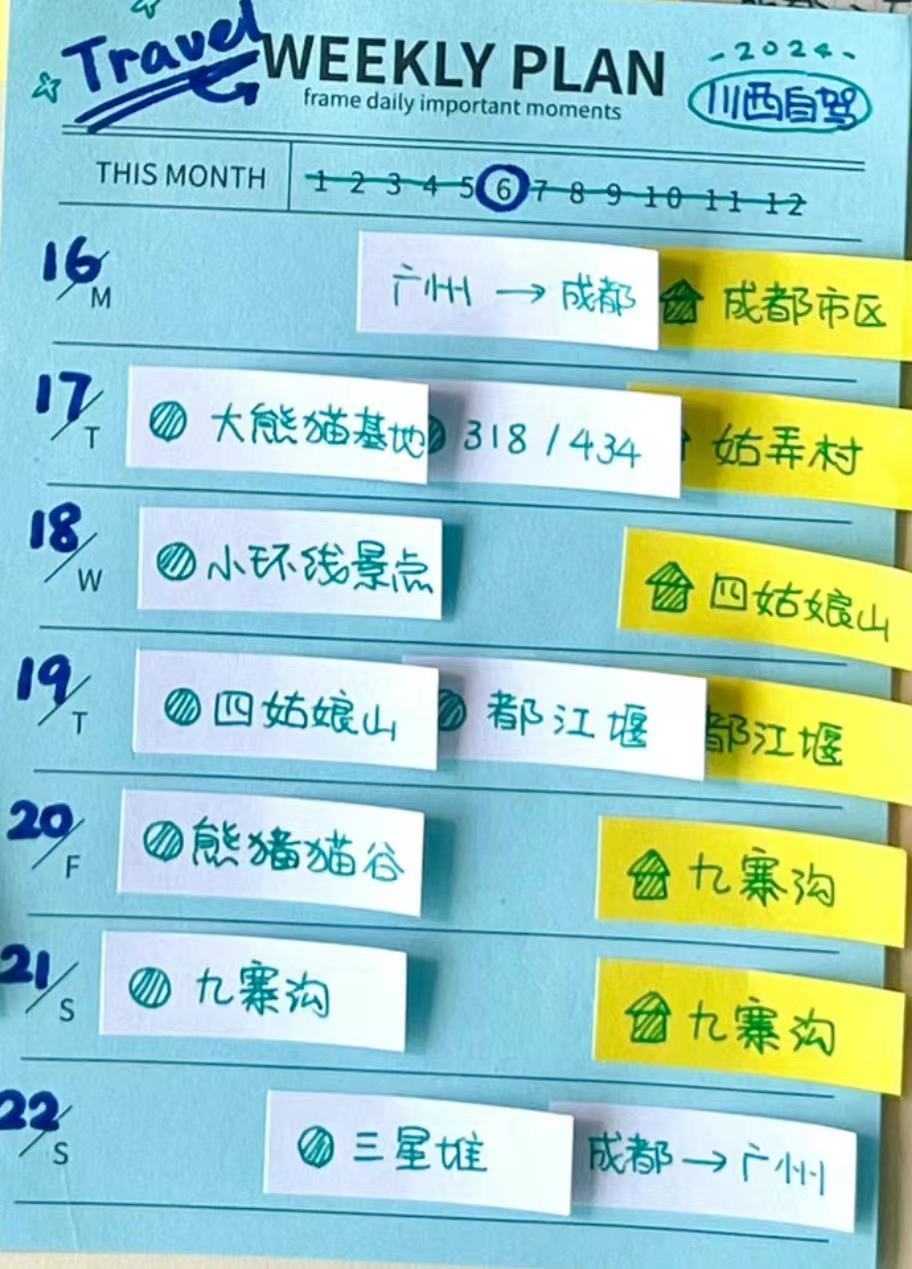

### #2

整合 `query_base64_image_description` 函数和 Markdown 格式渲染方法，使得输出结果更易阅读。

In [24]:
content = query_base64_image_description("./images/plan01.jpg")
print(content)

这张图片展示了一份用中文写的周计划表，从星期一到星期日（16日到22日）。它使用了彩色便签纸来标记不同的活动或任务。

具体内容包括：
- 16日（星期一）: 表示有行程从市中心到火车站，然后是回家的标记。
- 17日（星期二）: 有一个不确定的活动地点和一个事件编号318 / 434，配字“优先考试”。
- 18日（星期三）: 表示进行口语练习。
- 19日（星期四）: 提到了“回家吃饭”和“松江地铁”可能是关于交通的安排。
- 20日（星期五）: 是“解决矛盾”的活动。
- 21日（星期六）: 提到了“买菜”和“买牙膏”。
- 22日（星期日）: 是从一个地点到另一个地点的行程，由标志所示。

整体看，这是一个个人的周计划安排，涉及日常生活中的各种任务和活动。


In [25]:
def query_base64_image_description_v2(image_path, max_tokens=1000):
    content = query_base64_image_description(image_path, prompt="请使用 Markdown 格式解释下图里的内容？", max_tokens=max_tokens)
    display(Markdown(content))
    
query_base64_image_description_v2("./images/plan01.jpg")

这是一张展示周计划的图。图中通过蓝色的背景和彩色小标签，清晰地分布了一周的各种活动和计划。下面是详细的Markdown格式解释：

```markdown
# 周计划

**日期**|**活动**
:-------|:----
**16日 (星期一)**|前往 -> 西安，西安市中心
**17日 (星期二)**|不确定活动，房间号：318 / 434，优惠活动
**18日 (星期三)**|小王生日派对
**19日 (星期四)**|团队聚餐，饭厅I部，饭厅II部
**20日 (星期五)**|商务洽谈
**21日 (星期六)**|下乡考察
**22日 (星期日)**|三里屯，前往 -> 小门
```

从表格内容可以看出，这个计划表不仅包括了工作如商务洽谈、团队聚餐等，还有个人活动如小王的生日派对，以及周末的外出活动等。每日的活动都配有相应的详细信息或注释，让这份计划清晰易懂。